<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Keras_220907_Layer%EC%83%9D%EC%84%B1%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

## Sequencial model 생성 연습하기

레이어 10개 입력 5개 출력 3개

홀수 번째 레이어는 노드 수 5개,짝수 번째 레이어는 노드 수 10개

-> 짝수 번째 레이어만 학습이 가능하도록 설정(keras의 layers class에서 상속받은 속성을 활용할 것)

activation function을 다양하도록 만들어볼 것.

In [3]:
model = keras.Sequential(
    [
        layers.Dense(5, activation="tanh", trainable=False, name="layers1"),
        layers.Dense(10, activation="tanh", name="layers2"),
        layers.Dense(5, activation="tanh", trainable=False, name="layers3"),
        layers.Dense(10, activation="relu", name="layers4"),
        layers.Dense(5, activation="selu", trainable=False, name="layers5"),
        layers.Dense(10, activation="elu", name="layers6"),
        layers.Dense(5, activation="linear", trainable=False, name="layers7"),
        layers.Dense(10, activation="softsign", name="layers8"),
        layers.Dense(5, activation="sigmoid", trainable=False, name="layers9"),
        layers.Dense(3, activation="softmax", name="layer10")
    ],
    name="model"
)

In [4]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [5]:
tf.keras.metrics.CategoricalAccuracy?

In [6]:
x = tf.ones((1,10))
y = model(x)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layers1 (Dense)             (1, 5)                    55        
                                                                 
 layers2 (Dense)             (1, 10)                   60        
                                                                 
 layers3 (Dense)             (1, 5)                    55        
                                                                 
 layers4 (Dense)             (1, 10)                   60        
                                                                 
 layers5 (Dense)             (1, 5)                    55        
                                                                 
 layers6 (Dense)             (1, 10)                   60        
                                                                 
 layers7 (Dense)             (1, 5)                    55    

In [8]:
model.weights

[<tf.Variable 'layers1/kernel:0' shape=(10, 5) dtype=float32, numpy=
 array([[-0.20513159, -0.33614972, -0.23140496,  0.6042486 , -0.5640532 ],
        [ 0.00313342, -0.03549755, -0.5648423 ,  0.14061165, -0.57484066],
        [-0.37928236, -0.51641995,  0.55802673,  0.60725576,  0.59119076],
        [-0.59619015,  0.38976973,  0.2840988 , -0.24263632,  0.50190836],
        [ 0.37526983,  0.17419386,  0.15480965, -0.45752728,  0.00820673],
        [ 0.27657777,  0.23791027,  0.37871796,  0.2437303 , -0.33593076],
        [ 0.51114887, -0.09760869, -0.3605747 ,  0.03100377,  0.4840811 ],
        [ 0.15067905, -0.2742342 , -0.09047651, -0.18237993,  0.3473695 ],
        [-0.38095552, -0.08736497,  0.10688448, -0.41290456, -0.05434018],
        [-0.55346566, -0.30464867,  0.18029529,  0.4585511 , -0.5304491 ]],
       dtype=float32)>,
 <tf.Variable 'layers1/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'layers2/kernel:0' shape=(5, 10) d

### Functional API 생성 연습하기

In [30]:
inputs_1 = keras.Input(shape=(784,))
inputs_2 = keras.Input(shape=(784,))

inputs = keras.layers.Concatenate(axis=1)([inputs_1, inputs_2])

dense_1 = layers.Dense(64, activation="relu", name="dense1")(inputs) 
dense_2 = layers.Dense(32, activation="relu", name="dnese2")(dense_1)

dense_3_1 = layers.Dense(32, activation="relu", name="dense3_1")(dense_2)
dense_3_2 = layers.Dense(32, activation="sigmoid", name="dense3_2")(dense_2)
dense_3 = keras.layers.Concatenate(axis=1)([dense_3_1, dense_3_2])

output1 = layers.Dense(10, activation="softmax", name="output1")(dense_3_1)
output2 = layers.Dense(10, activation="softmax", name="output2")(dense_3)
output3 = layers.Dense(10, activation="softmax", name="output3")(dense_3_2)

outputs = [output1, output2, output3]

model1 = keras.Model(inputs=inputs, outputs=outputs, name="test") 
# inputs 안에 list로 넣으면 분기하여 input한다. 하지만 성능적으로 좋은 모델은 아님(연산이 늘어나기 때문)

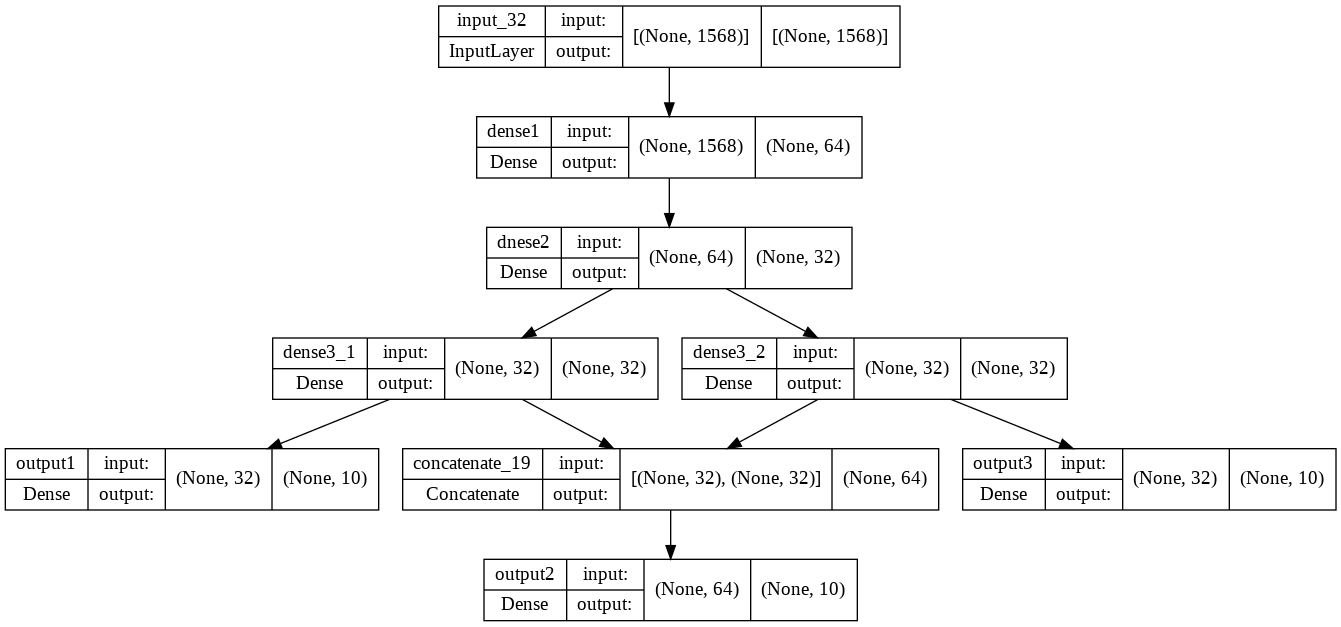

In [31]:
keras.utils.plot_model(model1, "test_model1.png", show_shapes=True)